In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("churn_customers_bank.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
cat_cols=df.select_dtypes(include="O").columns
cat_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [6]:
# checking garbage values
for i in cat_cols:
    print(i,df[i].unique())

Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']


<AxesSubplot:title={'center':'Count of Genders'}, xlabel='count', ylabel='Gender'>

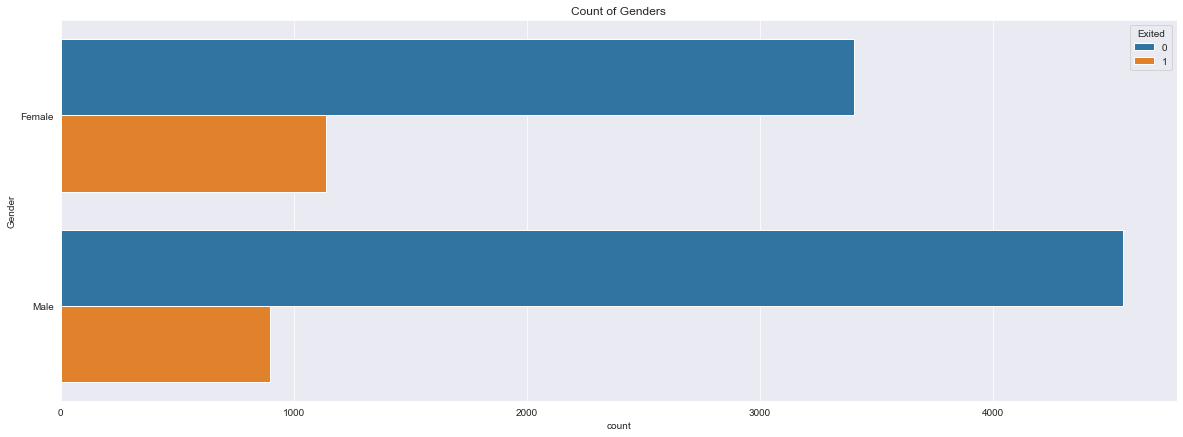

In [13]:
plt.figure(figsize=(20,7))
plt.title("Count of Genders")
sns.set_style("darkgrid")
sns.countplot(y=df['Gender'],hue=df['Exited'])

<AxesSubplot:title={'center':'Count of Geography'}, xlabel='count', ylabel='Geography'>

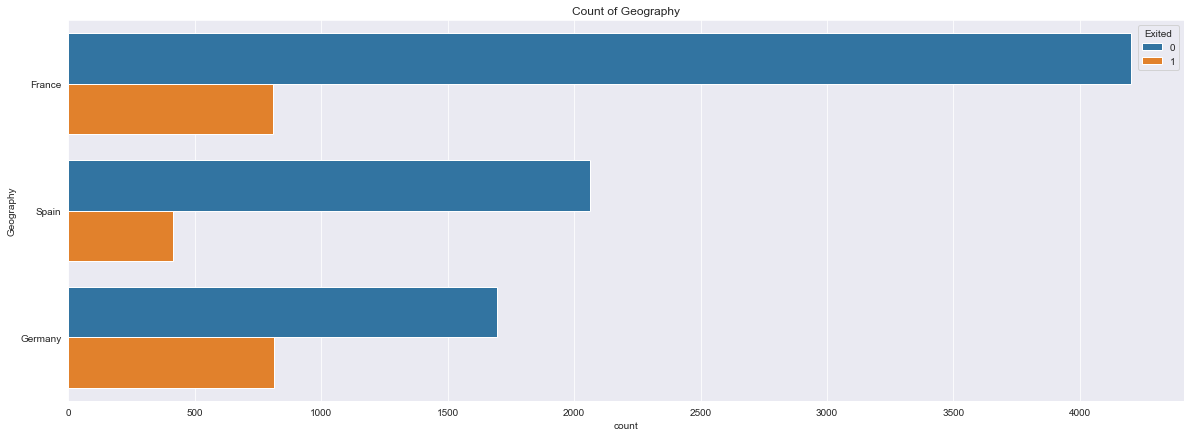

In [14]:
plt.figure(figsize=(20,7))
plt.title("Count of Geography")
sns.set_style("darkgrid")
sns.countplot(y=df['Geography'],hue=df['Exited'])

In [15]:
# Dropping unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Encoding
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df['Geography']=le.fit_transform(df['Geography'])

In [20]:
df['Gender']=le.fit_transform(df['Gender'])

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


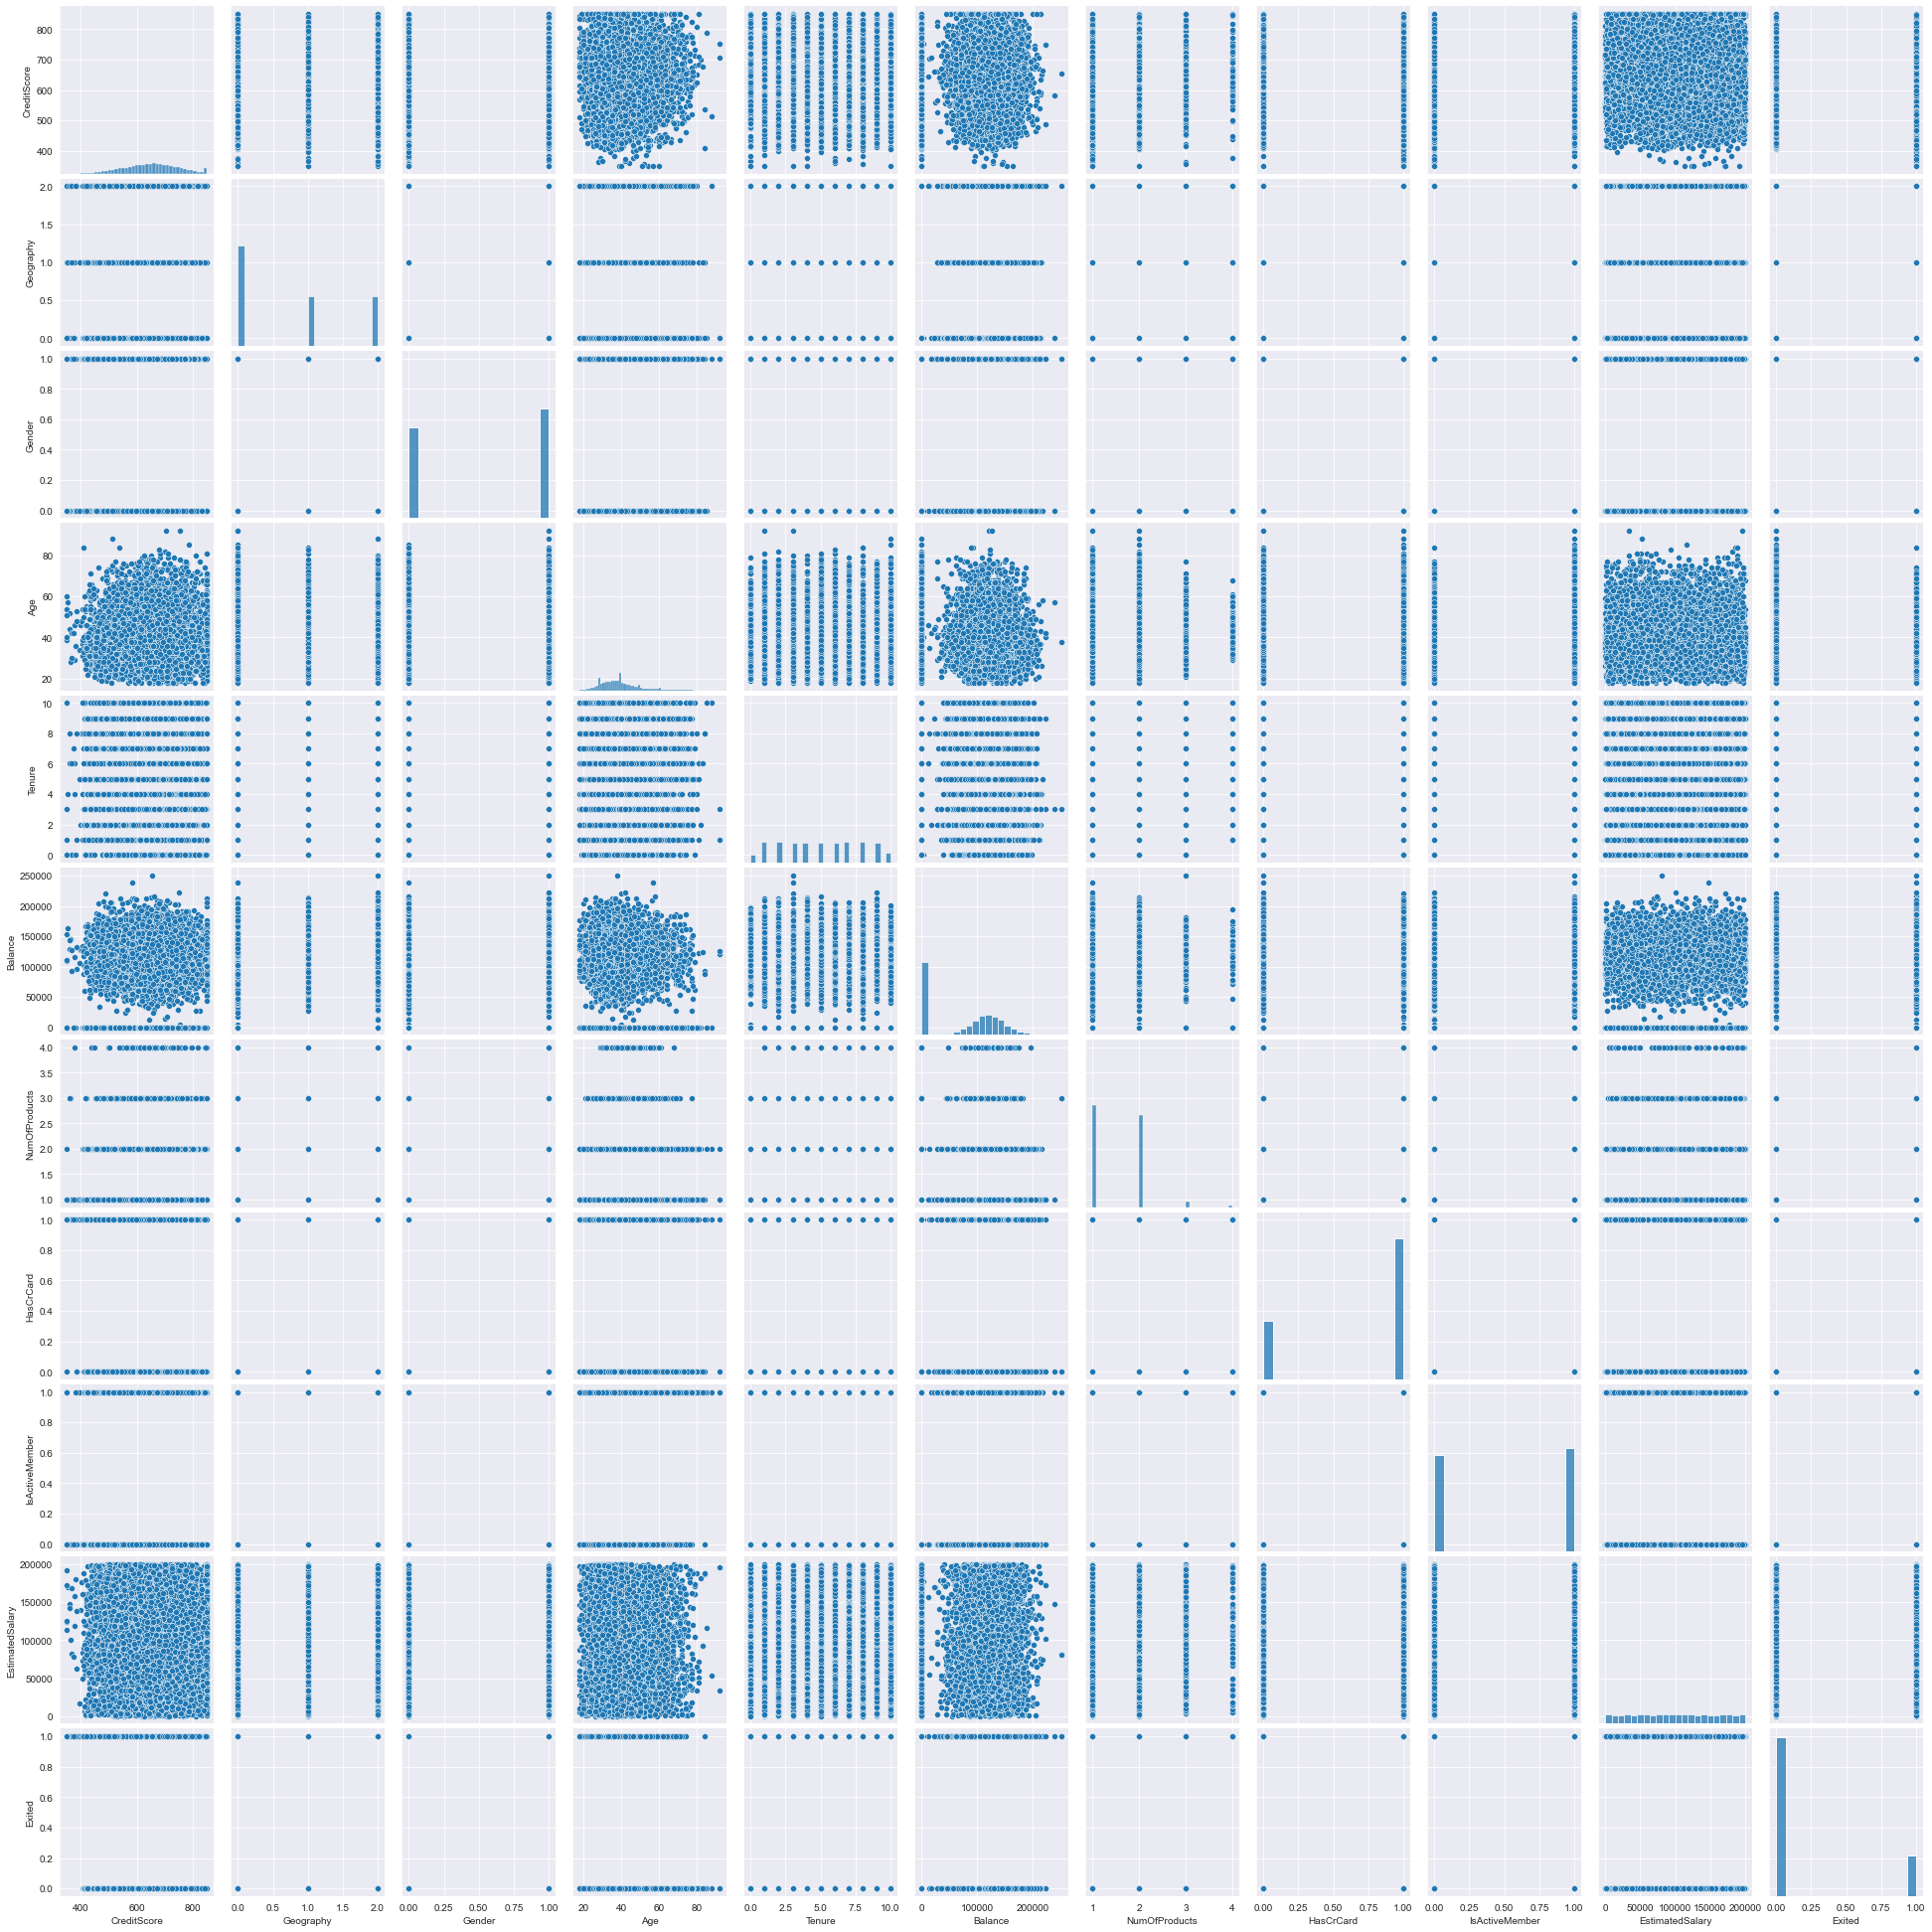

In [22]:
sns.pairplot(data=df)

<AxesSubplot:>

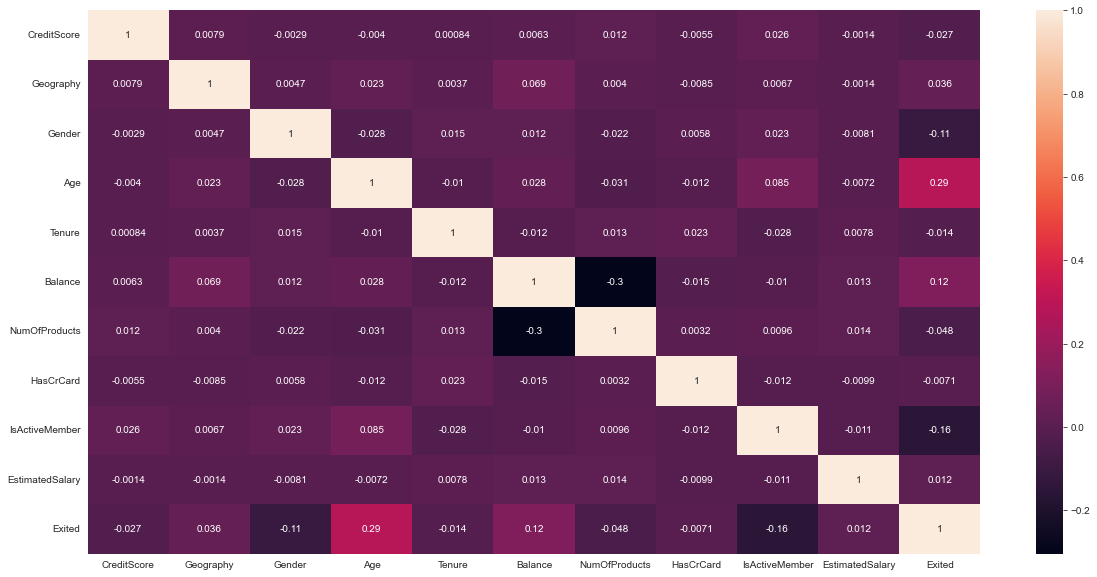

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [40]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [27]:
# Model Building
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.20)

In [30]:
X_train.shape

(8000, 10)

In [31]:
X_test.shape

(2000, 10)

In [32]:
y_train.shape

(8000,)

In [33]:
y_test.shape

(2000,)

In [34]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()

In [36]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score,roc_auc_score

In [43]:
print("train accuracy")
print(accuracy_score(y_train,y_pred_train))
print("Test accuracy")
print(accuracy_score(y_test,y_pred_test))

train accuracy
0.809875
Test accuracy
0.801


In [45]:
print("train data")
print(classification_report(y_train,y_pred_train))
print("Test data")
print(classification_report(y_test,y_pred_test))

train data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6377
           1       0.61      0.17      0.27      1623

    accuracy                           0.81      8000
   macro avg       0.72      0.57      0.58      8000
weighted avg       0.78      0.81      0.76      8000

Test data
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1586
           1       0.57      0.15      0.24       414

    accuracy                           0.80      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.76      0.80      0.75      2000



In [48]:
y_train_proba=lr.predict_proba(X_train)[:,1]
y_train_proba

array([0.02553702, 0.21082324, 0.12113556, ..., 0.06866565, 0.050694  ,
       0.10672659])

In [49]:
y_test_proba=lr.predict_proba(X_test)[:,1]
y_test_proba

array([0.06772579, 0.05608258, 0.03433296, ..., 0.13173248, 0.13118924,
       0.17598303])

In [50]:
from sklearn.metrics import precision_recall_curve

In [51]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

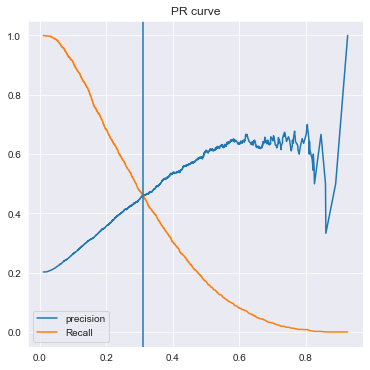

In [54]:
plt.figure(figsize=(6,6))
plt.title("PR curve")
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="Recall")
plt.axvline(0.31)